In [2]:
!pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable


In [3]:
pip install dpcpp-cpp-rt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install config

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install flask

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [9]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from flask import Flask, render_template, request, Markup
import numpy as np
import pandas as pd
import requests
import config
import pickle
import io

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
from sklearn import metrics
from sklearn import tree

In [10]:
import pandas as pd                       #Pandas is used for the manipulation of Dataset and to perform operations on the Data
import numpy as np                        #Numpy is used to perform mathematical operations
import statistics                         #Used for implementing statistical tools
import seaborn as sns                     #Used for heatmap correlation
import matplotlib.pyplot as plt           #For graphical representation of data
from numpy import percentile              #using percentile function
from sklearn.impute import SimpleImputer  #handling missing values

In [11]:
df = pd.read_csv('diabetes.csv')

In [12]:
df.head() #The df.head() function displays the records at the top of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1,89.0,NaN,NaN,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [13]:
df.size

6912

In [14]:
df.shape

(768, 9)

In [15]:
df['Outcome'].unique()

array([1, 0])

In [16]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [17]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
print('Number of rows :', df.shape[0])    #Used to find number of rows 
print('Number of columns :', df.shape[1]) #Used to find number of columns

Number of rows : 768
Number of columns : 9


In [20]:
df.info()         #The info() method prints information about the DataFramelike datatype, count, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   766 non-null    float64
 2   BloodPressure             765 non-null    float64
 3   SkinThickness             765 non-null    float64
 4   Insulin                   765 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       766 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [21]:
  df.isnull().sum()       #Used to check the count of missing values

Pregnancies                 0
Glucose                     2
BloodPressure               3
SkinThickness               3
Insulin                     3
BMI                         0
DiabetesPedigreeFunction    5
Age                         2
Outcome                     0
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer                                        #We use simpleImputer to handle the missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')                 #We replace the missing values with the mean of that particular column
imputer.fit(df.iloc[:, 0:])
df.iloc[:, 0:] = imputer.transform(df.iloc[:, 0:])

In [23]:
df.isnull().sum()       #Used to check the count of missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [25]:
df[df.duplicated()]             #Checking for duplicates

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [26]:
from sklearn.model_selection import train_test_split

# Split the dataset into the training set and test set
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Print the shape of the training and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (614, 8)
Test set shape: (154, 8)


In [27]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7.0,150.0,78.0,29.0,126.0,35.2,0.692,54.0
118,4.0,97.0,60.0,23.0,0.0,28.2,0.443,22.0
247,0.0,165.0,90.0,33.0,680.0,52.3,0.427,23.0
157,1.0,109.0,56.0,21.0,135.0,25.2,0.833,23.0
468,8.0,120.0,0.0,0.0,0.0,30.0,0.183,38.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
192,7.0,159.0,66.0,0.0,0.0,30.4,0.383,36.0
629,4.0,94.0,65.0,22.0,0.0,24.7,0.148,21.0
559,11.0,85.0,74.0,0.0,0.0,30.1,0.300,35.0


In [28]:
y_train

603    1.0
118    0.0
247    0.0
157    0.0
468    1.0
      ... 
763    0.0
192    1.0
629    0.0
559    0.0
684    0.0
Name: Outcome, Length: 614, dtype: float64

In [29]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1.0,199.000000,76.0,43.0,0.000000,42.9,1.394,22.0
122,2.0,107.000000,74.0,30.0,100.000000,33.6,0.404,23.0
113,4.0,76.000000,62.0,0.0,0.000000,34.0,0.391,25.0
14,5.0,120.806789,72.0,19.0,79.576471,25.8,0.587,51.0
529,0.0,111.000000,65.0,0.0,0.000000,24.6,0.660,31.0
...,...,...,...,...,...,...,...,...
476,2.0,105.000000,80.0,45.0,191.000000,33.7,0.711,29.0
482,4.0,85.000000,58.0,22.0,49.000000,27.8,0.306,28.0
230,4.0,142.000000,86.0,0.0,0.000000,44.0,0.645,22.0
527,3.0,116.000000,74.0,15.0,105.000000,26.3,0.107,24.0


In [30]:
y_test

661    1.0
122    0.0
113    0.0
14     1.0
529    0.0
      ... 
476    1.0
482    0.0
230    1.0
527    0.0
380    0.0
Name: Outcome, Length: 154, dtype: float64

<AxesSubplot: >

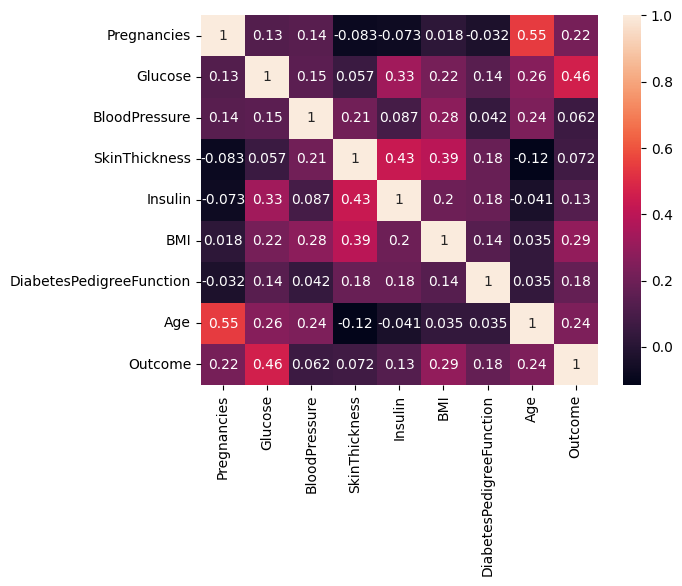

In [31]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Apply standard scaling to the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the output of the scaling
print("Scaled Training Data:")
print(X_train_scaled[:5])

# Train a logistic regression model on the scaled training set
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

Scaled Training Data:
[[ 0.90832902  0.9171928   0.45249882  0.52429727  0.37535554  0.37852648
   0.67669879  1.70995102]
 [ 0.03644676 -0.75098101 -0.47023008  0.14996743 -0.69985072 -0.50667229
  -0.07182942 -0.96587485]
 [-1.12606292  1.38931746  1.06765143  0.77385049  5.10284974  2.54094063
  -0.11992762 -0.88225529]
 [-0.8354355  -0.37328128 -0.67528095  0.02519082  0.45215599 -0.88604319
   1.10056416 -0.88225529]
 [ 1.19895644 -0.02705653 -3.54599311 -1.28496361 -0.69985072 -0.27904975
  -0.85342515  0.37203809]]
Accuracy: 0.8181818181818182


In [33]:
# Train a Decision Tree classifier with criterion Gini-index
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[88 19]
 [17 30]]
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       107
         1.0       0.61      0.64      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



[Text(0.41721082089552236, 0.9642857142857143, 'X[1] <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(0.14521144278606965, 0.8928571428571429, 'X[7] <= 28.5\ngini = 0.304\nsamples = 353\nvalue = [287, 66]'),
 Text(0.05472636815920398, 0.8214285714285714, 'X[5] <= 30.95\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(0.029850746268656716, 0.75, 'X[0] <= 7.0\ngini = 0.036000000000000004\nsamples = 110\nvalue = [108, 2]'),
 Text(0.01990049751243781, 0.6785714285714286, 'X[6] <= 0.672\ngini = 0.018000000000000002\nsamples = 109\nvalue = [108, 1]'),
 Text(0.009950248756218905, 0.6071428571428571, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.029850746268656716, 0.6071428571428571, 'X[6] <= 0.6970000000000001\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.01990049751243781, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03980099502487562, 0.5357142857142857, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.0398009950248756

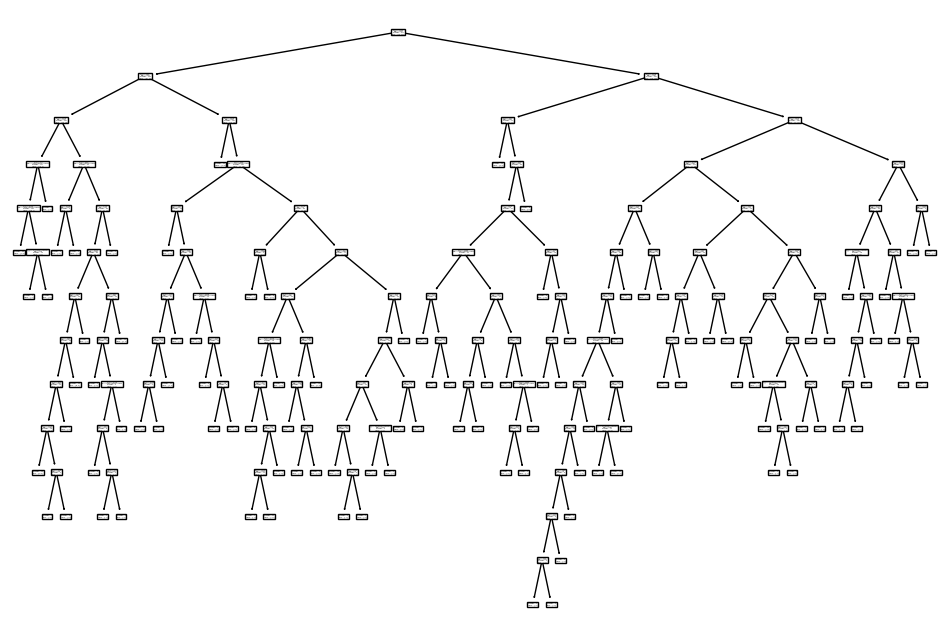

In [34]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train,y_train))

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) #To generate the confusion matrix
print(cm)
accuracy_score(y_test, y_pred)

[[88 19]
 [17 30]]


0.7662337662337663

In [36]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.summer):
    plt.clf
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
 
    width, height = cm.shape
 
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',color='black',fontsize=22)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

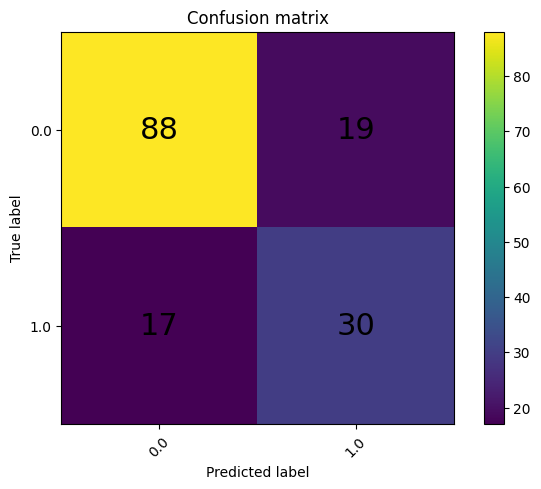

In [37]:
plot_confusion_matrix(cm, np.unique(y_pred))

In [38]:
# Create a list of feature names
feature_names = list(df.columns[:-1])

# Train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Print feature importances with names
for feature, importance in zip(feature_names, clf.feature_importances_):
    print(feature, ":", importance)

Pregnancies : 0.05003455804522169
Glucose : 0.31699955781510203
BloodPressure : 0.0898394336651645
SkinThickness : 0.039658180635553084
Insulin : 0.07023278056416334
BMI : 0.20893098005988134
DiabetesPedigreeFunction : 0.09876421472755839
Age : 0.12554029448735557


In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# assuming y_true and y_pred are the true and predicted labels, respectively
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


# print the results
print("True Positives:", tp)
print("False Positives:", fp)
print("True Negatives:", tn)
print("False Negatives:", fn)
print("Precision:", precision)
print("Recall:", recall)

True Positives: 30
False Positives: 19
True Negatives: 88
False Negatives: 17
Precision: 0.6122448979591837
Recall: 0.6382978723404256


In [40]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F-score:", f1)

F-score: 0.625


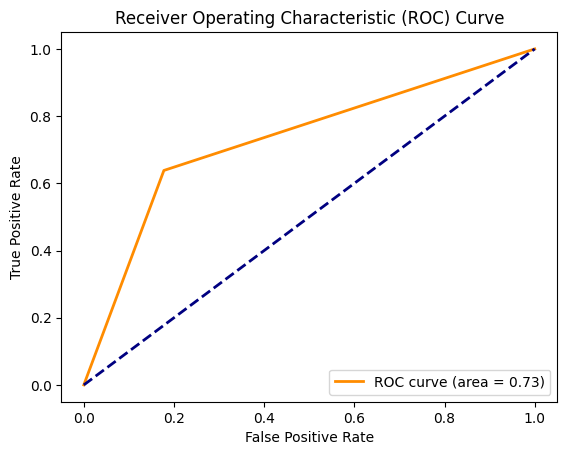

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# assuming y_true and y_score contain the true labels and predicted scores respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [42]:
# Import required libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score


# Initialize the classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
dtc_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dtc_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifiers
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
dtc_gini.fit(X_train, y_train)
dtc_entropy.fit(X_train, y_train)
rfc.fit(X_train, y_train)


# Predict on the test set
gnb_pred = gnb.predict(X_test)
mnb_pred = mnb.predict(X_test)
dtc_gini_pred = dtc_gini.predict(X_test)
dtc_entropy_pred = dtc_entropy.predict(X_test)
rfc_pred = rfc.predict(X_test)

# Calculate the performance metrics
gnb_accuracy = accuracy_score(y_test, gnb_pred)
mnb_accuracy = accuracy_score(y_test, mnb_pred)
dtc_gini_accuracy = accuracy_score(y_test, dtc_gini_pred)
dtc_entropy_accuracy = accuracy_score(y_test, dtc_entropy_pred)
rfc_accuracy = accuracy_score(y_test, rfc_pred)

gnb_precision = precision_score(y_test, gnb_pred)
mnb_precision = precision_score(y_test, mnb_pred)
dtc_gini_precision = precision_score(y_test, dtc_gini_pred)
dtc_entropy_precision = precision_score(y_test, dtc_entropy_pred)
rfc_precision = precision_score(y_test, rfc_pred)

gnb_recall = recall_score(y_test, gnb_pred)
mnb_recall = recall_score(y_test, mnb_pred)
dtc_gini_recall = recall_score(y_test, dtc_gini_pred)
dtc_entropy_recall = recall_score(y_test, dtc_entropy_pred)
rfc_recall = recall_score(y_test, rfc_pred)

gnb_f1_score = f1_score(y_test, gnb_pred)
mnb_f1_score = f1_score(y_test, mnb_pred)
dtc_gini_f1_score = f1_score(y_test, dtc_gini_pred)
dtc_entropy_f1_score = f1_score(y_test, dtc_entropy_pred)
rfc_f1_score = f1_score(y_test, rfc_pred)

gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_pred)
gnb_roc_auc = roc_auc_score(y_test, gnb_pred)
mnb_fpr, mnb_tpr, _ = roc_curve(y_test, mnb_pred)
mnb_roc_auc = roc_auc_score(y_test, mnb_pred)

dtc_gini_fpr, dtc_gini_tpr, _ = roc_curve(y_test, dtc_gini_pred)
dtc_gini_roc_auc = roc_auc_score(y_test, dtc_gini_pred)

dtc_entropy_fpr, dtc_entropy_tpr, _ = roc_curve(y_test, dtc_entropy_pred)
dtc_entropy_roc_auc = roc_auc_score(y_test, dtc_entropy_pred)

rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_pred)
rfc_roc_auc = roc_auc_score(y_test, rfc_pred)

In [43]:
# Print the performance metrics
print("Accuracy Scores:")
print("Gaussian Naive Bayes:", gnb_accuracy)
print("Multinomial Naive Bayes:", mnb_accuracy)
print("Decision Tree (Gini):", dtc_gini_accuracy)
print("Decision Tree (Entropy):", dtc_entropy_accuracy)
print("Random Forest:", rfc_accuracy)
print("\n")

print("Precision Scores:")
print("Gaussian Naive Bayes:", gnb_precision)
print("Multinomial Naive Bayes:", mnb_precision)
print("Decision Tree (Gini):", dtc_gini_precision)
print("Decision Tree (Entropy):", dtc_entropy_precision)
print("Random Forest:", rfc_precision)
print("\n")

print("Recall Scores:")
print("Gaussian Naive Bayes:", gnb_recall)
print("Multinomial Naive Bayes:", mnb_recall)
print("Decision Tree (Gini):", dtc_gini_recall)
print("Decision Tree (Entropy):", dtc_entropy_recall)
print("Random Forest:", rfc_recall)
print("\n")

print("F1 Scores:")
print("Gaussian Naive Bayes:", gnb_f1_score)
print("Multinomial Naive Bayes:", mnb_f1_score)
print("Decision Tree (Gini):", dtc_gini_f1_score)
print("Decision Tree (Entropy):", dtc_entropy_f1_score)
print("Random Forest:", rfc_f1_score)
print("\n")

Accuracy Scores:
Gaussian Naive Bayes: 0.7857142857142857
Multinomial Naive Bayes: 0.6298701298701299
Decision Tree (Gini): 0.7597402597402597
Decision Tree (Entropy): 0.7402597402597403
Random Forest: 0.7792207792207793


Precision Scores:
Gaussian Naive Bayes: 0.6666666666666666
Multinomial Naive Bayes: 0.40384615384615385
Decision Tree (Gini): 0.5961538461538461
Decision Tree (Entropy): 0.5660377358490566
Random Forest: 0.6511627906976745


Recall Scores:
Gaussian Naive Bayes: 0.5957446808510638
Multinomial Naive Bayes: 0.44680851063829785
Decision Tree (Gini): 0.6595744680851063
Decision Tree (Entropy): 0.6382978723404256
Random Forest: 0.5957446808510638


F1 Scores:
Gaussian Naive Bayes: 0.6292134831460674
Multinomial Naive Bayes: 0.42424242424242425
Decision Tree (Gini): 0.6262626262626262
Decision Tree (Entropy): 0.6
Random Forest: 0.6222222222222222




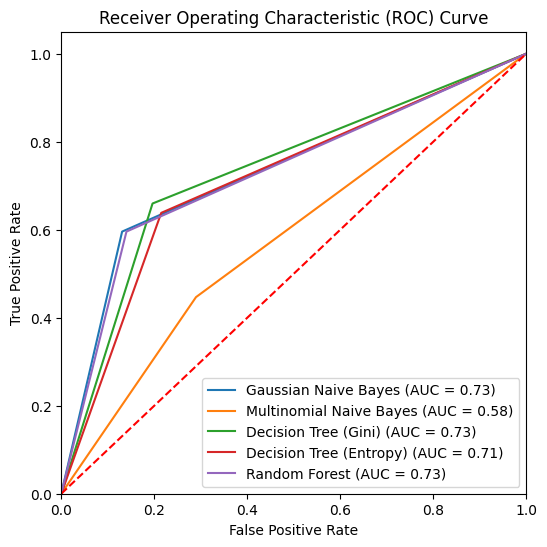

In [87]:
# Plot the ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(gnb_fpr, gnb_tpr, label="Gaussian Naive Bayes (AUC = %0.2f)" % gnb_roc_auc)
plt.plot(mnb_fpr, mnb_tpr, label="Multinomial Naive Bayes (AUC = %0.2f)" % mnb_roc_auc)
plt.plot(dtc_gini_fpr, dtc_gini_tpr, label="Decision Tree (Gini) (AUC = %0.2f)" % dtc_gini_roc_auc)
plt.plot(dtc_entropy_fpr, dtc_entropy_tpr, label="Decision Tree (Entropy) (AUC = %0.2f)" % dtc_entropy_roc_auc)
plt.plot(rfc_fpr, rfc_tpr, label="Random Forest (AUC = %0.2f)" % rfc_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc= "lower right")
plt.show()

In [45]:
features = df[['Pregnancies', 'Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
target = df['Outcome']
labels = df['Outcome']

In [46]:
acc = []
model = []

In [47]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.6948051948051948
              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82       107
         1.0       0.00      0.00      0.00        47

    accuracy                           0.69       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.48      0.69      0.57       154



In [48]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.64935065, 0.64935065, 0.64935065, 0.65359477, 0.65359477])

In [49]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.8051948051948052
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       107
         1.0       0.74      0.55      0.63        47

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.75       154
weighted avg       0.80      0.81      0.80       154



In [50]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.75974026, 0.75324675, 0.73376623, 0.81045752, 0.76470588])

In [51]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.7922077922077922
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       107
         1.0       0.68      0.60      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [52]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

XGBoost's Accuracy is:  0.7727272727272727
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       107
         1.0       0.63      0.62      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

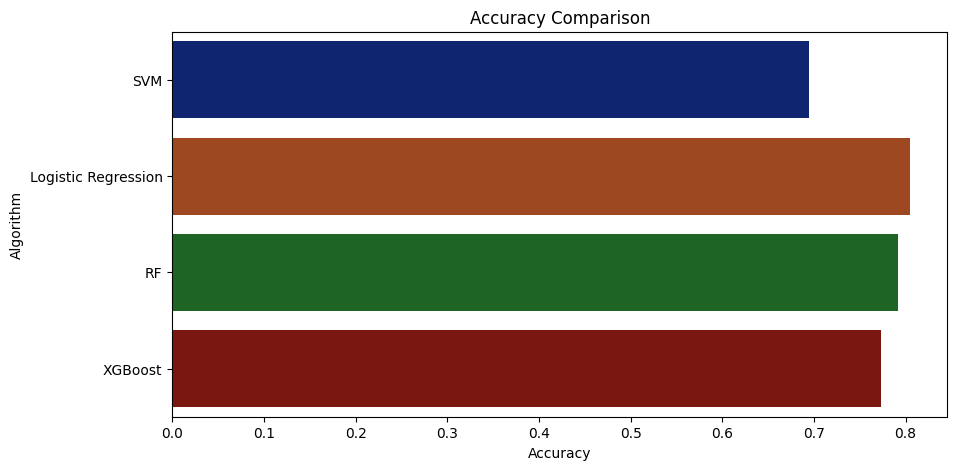

In [53]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [54]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

SVM --> 0.6948051948051948
Logistic Regression --> 0.8051948051948052
RF --> 0.7922077922077922
XGBoost --> 0.7727272727272727


Text(0.5, 1.0, 'Correlation heatmap')

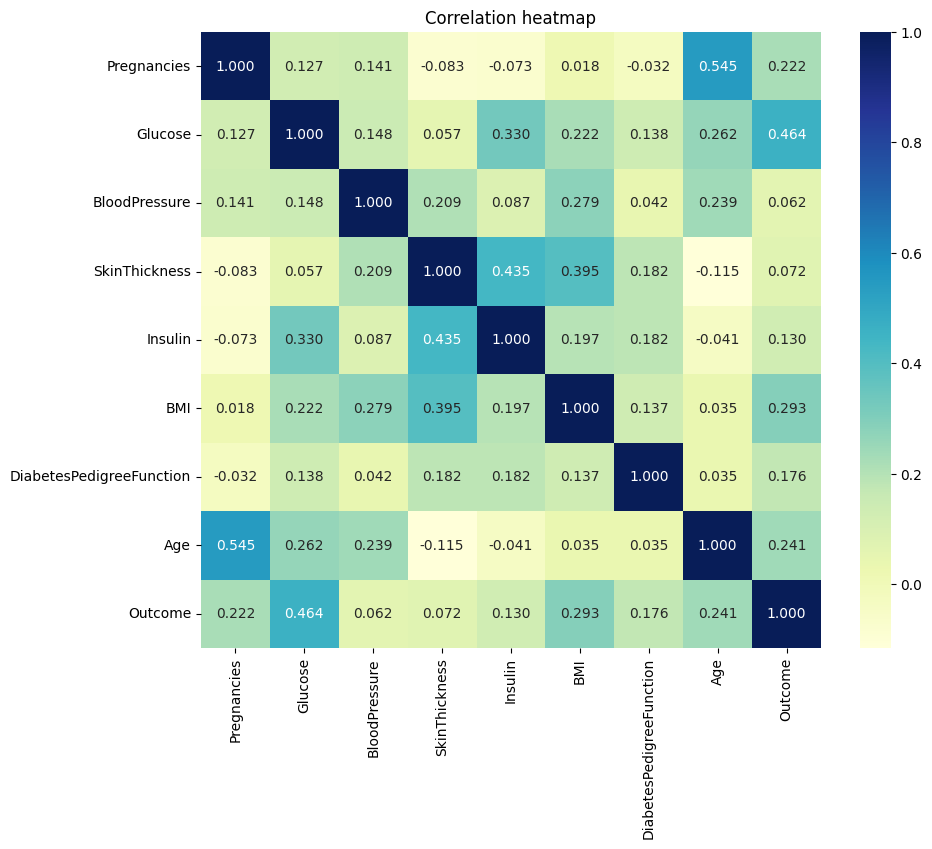

In [55]:
plt.figure(figsize = (10, 8))  
sns.heatmap(df.corr(), annot = True, fmt = ".3f", cmap = "YlGnBu")  
plt.title("Correlation heatmap")  

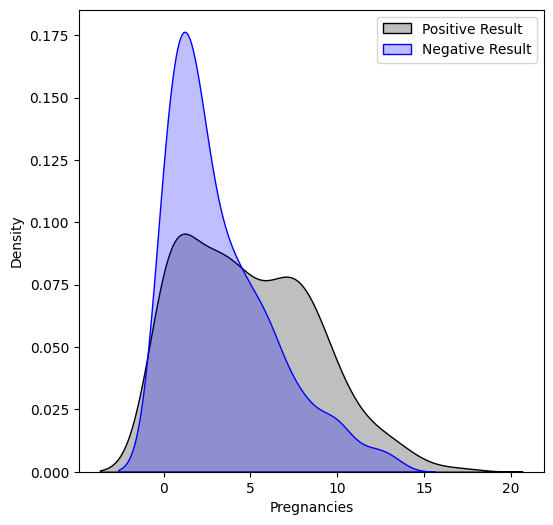

In [88]:
# Exploring Pregnancy and target variables together  
  
plt.figure(figsize = (6,6))  
  
# Plotting density function graph of the pregnancies and the target variable  
kde = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1], color = "Black", shade = True)  
kde = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0], ax = kde, color = "Blue", shade= True)  
kde.set_xlabel("Pregnancies")  
kde.set_ylabel("Density")  
kde.legend(["Positive Result", "Negative Result"])  

<AxesSubplot: xlabel='Outcome', ylabel='Glucose'>

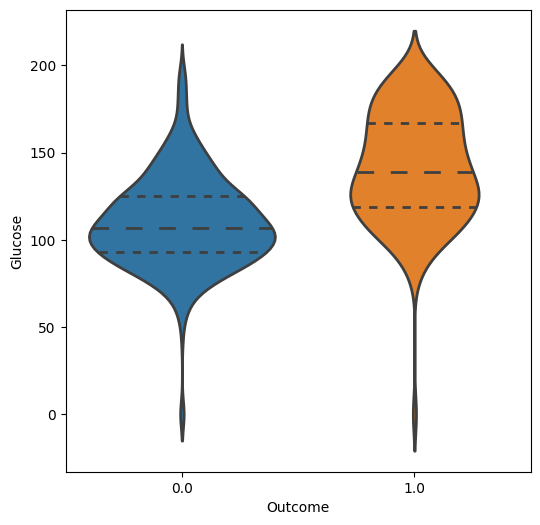

In [89]:
# Exploring the Glucose and the Target variables together  
plt.figure(figsize = (6, 6))  
sns.violinplot(data = df, x = "Outcome", y = "Glucose",  
               split = True, inner = "quart", linewidth = 2) 

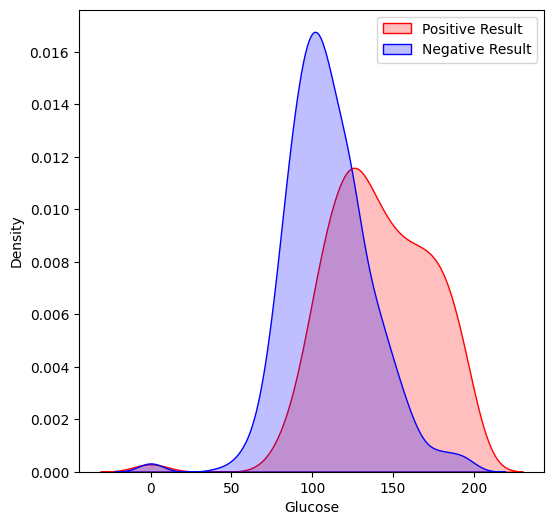

In [90]:
 #Exploring the density function plot of the Glucose levels  
  
plt.figure(figsize = (6, 6))  
kde = sns.kdeplot(df["Glucose"][df["Outcome"] == 1], color = "Red", shade = True)  
kde = sns.kdeplot(df["Glucose"][df["Outcome"] == 0], ax = kde, color = "Blue", shade= True)  
kde.set_xlabel("Glucose")  
kde.set_ylabel("Density")  
kde.legend(["Positive Result","Negative Result"]) 

In [59]:
# Transforming the data into quartiles 
from sklearn.preprocessing import QuantileTransformer  
quartile  = QuantileTransformer()  
X = quartile.fit_transform(df)  
dataset = quartile.transform(X)  
dataset = pd.DataFrame(X)  
dataset.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']  
# Showing the top 5 rows of the transformed dataset  
dataset.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.811604,0.520209,0.802477,0.000000,0.591265,0.750978,0.891134,1.0
1,0.232725,0.097784,0.335724,0.646023,0.000000,0.227510,0.473272,0.558670,0.0
2,0.863755,0.956975,0.279009,0.000000,0.000000,0.091917,0.782269,0.585398,1.0
3,0.232725,0.131030,0.414602,0.457627,0.664928,0.298566,0.106258,0.000000,0.0
4,0.000000,0.724250,0.050847,0.802477,0.836375,0.926988,0.997392,0.605606,1.0


In [60]:
# Splitting the dependent and independent features  
X = df.drop(["Outcome"], axis = 1)  
Y = df["Outcome"]  
  
# Splitting the dataset into the training and testing dataset  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 10)  
  
# Printing the size of the training and testing dataset  
print("The size of the training dataset: ", X_train.size)  
print("The size of the testing dataset: ", X_test.size)  

The size of the training dataset:  3680
The size of the testing dataset:  2464


In [61]:
# Python program to create a function to validate models  
  
def cv_model(models):  
    """ 
    We will create a list of machine learning models and print graphs of cross-validation scores with the help of mean accuracy. 
    """  
      
    # Cross validating the model using the Kfold stratified cross-validation method  
    k_fold = StratifiedKFold(n_splits = 15)  
      
    r = []  
    for m in models :  
        r.append(cross_val_score(estimator = m, X = X_train, y = Y_train, scoring = "accuracy", cv = k_fold, n_jobs = 4))  
  
    cross_val_means = []  
    cross_val_std = []  
    for result in r:  
        cross_val_means.append(result.mean())  
        cross_val_std.append(result.std())  
  
    df_result = pd.DataFrame({  
        "CrossValMean": cross_val_means,  
        "CrossValStd": cross_val_std,  
        "Model List":[  
            "DecisionTreeClassifier",  
            "LogisticRegression",  
            "SVC",  
            "AdaBoostClassifier",  
            "GradientBoostingClassifier",  
            "RandomForestClassifier",  
            "KNeighborsClassifier"  
        ]  
    })  
  
    # Generating the graph of cross-validation scores  
    bar_plot = sns.barplot(x = cross_val_means, y = df_result["Model List"].values, data = df_result)  
    bar_plot.set_xlabel("Mean of Cross Validation Accuracy Scores")  
    bar_plot.set_title("Cross Validation Scores of Models")  
    return df_result  

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


,CrossValMean,CrossValStd,Model List
0,0.673548,0.087588,DecisionTreeClassifier
1,0.780287,0.080770,LogisticRegression
2,0.778280,0.052385,SVC
3,0.680143,0.096432,AdaBoostClassifier
4,0.753978,0.081777,GradientBoostingClassifier
5,0.758136,0.069844,RandomForestClassifier
6,0.767384,0.049151,KNeighborsClassifier


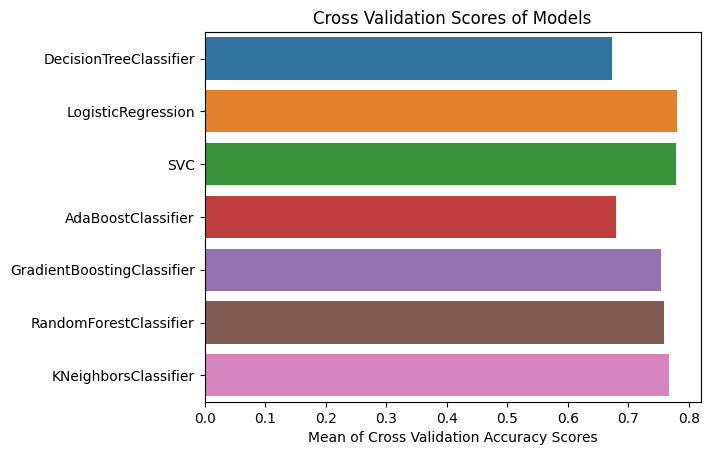

In [62]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split  
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier  
# Modeling the dataset using different machine learning algorithms  
state = 20  
models_list = [  
    DecisionTreeClassifier(random_state = state),  
    LogisticRegression(random_state = state, solver ='liblinear'),  
    SVC(random_state = 20),  
    AdaBoostClassifier(DecisionTreeClassifier(random_state = state), random_state = state, learning_rate = 0.3),  
    GradientBoostingClassifier(random_state = state),  
    RandomForestClassifier(random_state = state),  
    KNeighborsClassifier()  
]  
cv_model(models_list) 

In [63]:
# Importing the required libraries  
from sklearn.metrics import classification_report  
from sklearn.model_selection import GridSearchCV  
  
# Defining a function to analyse the grid results  
def analyze_grid(grid):  
    ''''' 
    Analyzing the results of GridCV method and making predictions for the test data 
    Presenting the classification report at the end 
    '''      
    # Printing the best parameter and accuracy score  
    print("Tuned hyperparameters: ", grid.best_params_)  
    print("Accuracy Score:", grid.best_score_)  
      
    mean_values = grid.cv_results_["mean_test_score"]  
    std_values = grid.cv_results_["std_test_score"]  
    for m, s, p in zip(mean_values, std_values, grid.cv_results_["params"]):  
      print(f"Mean: {m}, Std: {s} * 2, Params: {p}")  
      print("The classification Report:")  
    Y_true, Y_pred = Y_test, grid.predict(X_test)  
    print(classification_report(Y_true, Y_pred))  
    print()  

In [64]:
# Defining the Logistic Regression model and its parameters  
model = LogisticRegression(solver ='liblinear')  
solver_list = ['liblinear']  
penalty_type = ['l2']  
c_values = [200, 100, 10, 1.0, 0.01]  
  
# Defining the grid search  
grid_lr = dict(solver = solver_list, penalty = penalty_type, C = c_values)  
cross_val = StratifiedKFold(n_splits = 100, random_state = 10, shuffle = True)  
grid_search_cv = GridSearchCV(estimator = model, param_grid = grid_lr, cv = cross_val, scoring = 'accuracy', error_score = 0)  
lr_result = grid_search_cv.fit(X_train, Y_train)  
  
# Result of Hyper Parameters of Logistic Regression  
analyze_grid(lr_result)  

Tuned hyperparameters:  {'C': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Score: 0.7709999999999999
Mean: 0.7709999999999999, Std: 0.1768021493082027 * 2, Params: {'C': 200, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7709999999999999, Std: 0.1768021493082027 * 2, Params: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7665, Std: 0.17959050643060173 * 2, Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7675, Std: 0.1834904629674251 * 2, Params: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.6880000000000002, Std: 0.20641220894123488 * 2, Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       201
         1.0       0.70      0.54      0.61       107

    accuracy                           0.76

In [65]:
# Defining the SVC model and its parameters  
  
# Defining the grid search  
svc = SVC()  
parameters = [  
    {"kernel": ["rbf"], "gamma": [1e-4], "C": [200, 100, 10, 1.0, 0.01]}  
]  
  
# Performing the cross-validation with tuned parameters  
cross_val = StratifiedKFold(n_splits = 3, random_state = 10, shuffle = True)  
  
# Performing the grid search  
grid = GridSearchCV(estimator = svc, param_grid = parameters, cv = cross_val, scoring = 'accuracy')  
  
# SVC Hyperparameter tuning result  
result = grid.fit(X_train, Y_train)  
  
analyze_grid(result) 

Tuned hyperparameters:  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy Score: 0.7607871431400843
Mean: 0.7325354384177913, Std: 0.037805828486302 * 2, Params: {'C': 200, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.7499504852446028, Std: 0.026740535222946744 * 2, Params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.7607871431400843, Std: 0.03267430587947693 * 2, Params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.7542794895736072, Std: 0.022227757516290445 * 2, Params: {'C': 1.0, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.650001414707297, Std: 0.002707677330225552 * 2, Params: {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       201
         1.0       0.63      0.46      0.53       107

    accuracy                           0.72       308

In [66]:
# Defining the SVC model and its parameters  
  
# Defining the grid search  
rfc = RandomForestClassifier(random_state = 42)  
parameters = {   
    'n_estimators': [500],  
    'max_features': ['log2'],  
    'max_depth' : [4,5,6],  
    'criterion' :['entropy']  
}  
  
# Performing the cross-validation with tuned parameters  
cross_val = StratifiedKFold(n_splits = 3, random_state = 10, shuffle = True)  
  
# Performing the grid search  
grid = GridSearchCV(estimator = rfc, param_grid = parameters, cv = cross_val, scoring = 'accuracy')  
  
# SVC Hyperparameter Tuning Result  
result = grid.fit(X_train, Y_train)  
  
analyze_grid(result)  

Tuned hyperparameters:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
Accuracy Score: 0.7630223806694394
Mean: 0.7630223806694394, Std: 0.00869318928395909 * 2, Params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
Mean: 0.7521574286280169, Std: 0.005989109498774427 * 2, Params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
Mean: 0.7412924765865943, Std: 0.006587038819237771 * 2, Params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.81       201
         1.0       0.68      0.49      0.57       107

    accuracy                           0.74       308
   macro avg       0.72      0.68      0.69       308
weighted avg       0.73      0.74      0.73       

In [70]:
model = []

model.append('RF')

In [71]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,Y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

RF's Accuracy is:  0.711038961038961
              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79       201
         1.0       0.61      0.47      0.53       107

    accuracy                           0.71       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.70      0.71      0.70       308



In [72]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Defining the SVC model and its parameters  
rfc = RandomForestClassifier(random_state = 42)  
parameters = {   
    'n_estimators': [500],  
    'max_features': ['log2'],  
    'max_depth' : [4,5,6],  
    'criterion' :['entropy']  
}  

# Performing the cross-validation with tuned parameters  
cross_val = StratifiedKFold(n_splits = 3, random_state = 10, shuffle = True)  

# Performing the grid search  
grid = GridSearchCV(estimator = rfc, param_grid = parameters, cv = cross_val, scoring = 'accuracy')  

# SVC Hyperparameter Tuning Result  
result = grid.fit(X_train, Y_train)  

# Analyze the grid search results  
def analyze_grid(result):
    print("Best: %f using %s" % (result.best_score_, result.best_params_))
    means = result.cv_results_['mean_test_score']
    stds = result.cv_results_['std_test_score']
    params = result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

# Save the trained model as a pkl file  
joblib.dump(result, 'random_forest.pkl')



['random_forest.pkl']

In [73]:
# Making the predictions  
Y_pred = lr_result.predict(X_test)  
print(classification_report(Y_test, Y_pred))  

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       201
         1.0       0.70      0.54      0.61       107

    accuracy                           0.76       308
   macro avg       0.74      0.71      0.72       308
weighted avg       0.75      0.76      0.75       308



In [74]:
X_test['predictions'] = Y_pred  
print(X_test)  


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
568          4.0    154.0           72.0           29.0    126.0  31.3   
620          2.0    112.0           86.0           42.0    160.0  38.4   
456          1.0    135.0           54.0            0.0      0.0  26.7   
197          3.0    107.0           62.0           13.0     48.0  22.9   
714          3.0    102.0           74.0            0.0      0.0  29.5   
..           ...      ...            ...            ...      ...   ...   
70           2.0    100.0           66.0           20.0     90.0  32.9   
679          2.0    101.0           58.0           17.0    265.0  24.2   
375         12.0    140.0           82.0           43.0    325.0  39.2   
700          2.0    122.0           76.0           27.0    200.0  35.9   
505         10.0     75.0           82.0            0.0      0.0  33.3   

     DiabetesPedigreeFunction   Age  predictions  
568                     0.338  37.0          1.0  
620      

In [76]:
import pickle
diabetes_recommendation_model_path = 'random_forest.pkl'
diabetes_recommendation_model = pickle.load(
    open(diabetes_recommendation_model_path, 'rb'))

In [77]:
def weather_fetch(city_name):
    """
    Fetch and returns the temperature and humidity of a city
    :params: city_name
    :return: temperature, humidity
    """
    api_key = config.weather_api_key
    base_url = "http://api.openweathermap.org/data/2.5/weather?"

    complete_url = base_url + "appid=" + api_key + "&q=" + city_name
    response = requests.get(complete_url)
    x = response.json()

    if x["cod"] != "404":
        y = x["main"]

        temperature = round((y["temp"] - 273.15), 2)
        humidity = y["humidity"]
        return temperature, humidity
    else:
        return None

In [80]:
from flask import Flask, render_template, request, Markup
app = Flask(__name__)

In [81]:
@ app.route('/')
def home():
    title = 'Agric.AI - Home'
    return render_template('index.html', title=title)

In [82]:
@ app.route('/crop-recommend')
def crop_recommend():
    title = 'Agric.AI - Crop Recommendation'
    return render_template('crop.html', title=title)

In [83]:
@ app.route('/crop-predict', methods=['POST'])
def crop_prediction():
    title = 'Agric.AI - Crop Recommendation'

    if request.method == 'POST':
        N = int(request.form['nitrogen'])
        P = int(request.form['phosphorous'])
        K = int(request.form['pottasium'])
        ph = float(request.form['ph'])
        rainfall = float(request.form['rainfall'])

        # state = request.form.get("stt")
        city = request.form.get("city")

        if weather_fetch(city) != None:
            temperature, humidity = weather_fetch(city)
            data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
            my_prediction = crop_recommendation_model.predict(data)
            final_prediction = my_prediction[0]

            return render_template('crop-result.html', prediction=final_prediction, title=title)

        else:

            return render_template('try_again.html', title=title)

In [84]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('Diabeto.html')

In [ ]:
plt.savefig('my_plot.png')